# Logistic Regression

* In statistics, the logistic model (or logit model) is a widely used statistical model that in its basic form uses a logistic function to model a binary dependent variable
* That means this method is used when the target is a categorical variable

* Hypotesis is the sigmoid function:
$h_\theta = \sigma(z)$

In [1]:
%matplotlib inline
# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# data manipulation 
import pandas as pd
import numpy as np

def sigmoid(z):
    return (1 / (1 + np.exp(-z)))

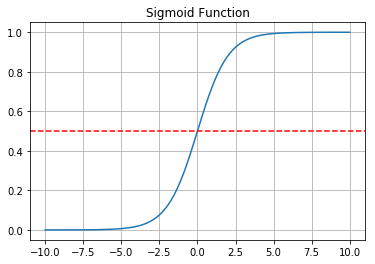

In [2]:
x = np.linspace(-10, 10, 100)
y = sigmoid(x)


fig, ax = plt.subplots()
ax.plot(x, y)
ax.axhline(y=0.5, linestyle = '--', color='r')
plt.title('Sigmoid Function')
plt.grid()

## Loss Function

* Our hypotesis function is non-linear (due to sigmoid transform)
* Squaring this function (as is done in MSE) results in a non-convex function with many local minimums
* The optimization method (e.g. Gradien Descent) may not find the optimal solution if the cost function has multiple local minimums

\begin{equation}\mathcal{L}(\theta) = log\ L(\theta) \end{equation}
\begin{equation}\mathcal{L}(\theta) = \sum_{i=1}^{n}y_{i}\log(h_{\theta}(x_{i})) + (1-y_{i})\log(1-h_{\theta}(x_{i})) \end{equation}

## Maximum Likelihood Estimation

* The likelihood is defined for a data set $\mathcal{D}$ with $N$ samples given a hypothesis (denoted arbitrarily $g$ here):

$$
L(\mathcal{D} \mid g) =
\prod_{n=1}^{N} P(y_n \mid {\bf x}_n) =
\prod_{n=1}^{N} \theta(y_n \; {\bf w}_g^T {\bf x}_n)
$$

* Finding a good hypothesis consists in the parameterization ${\theta}$ that maximizes the likelihood.

$$
\theta_{MLE} = \underset{\theta \in \Theta}{\mathrm{argmax}} P(\mathcal{D} \mid \theta)
$$


## Breast Cancer Wisconsin Dataset

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. 


<img style="float: left;" width="500" src="images/biopsy.jpg">

 ### Attribute Information:

* Output:
    * ID number 
    * Diagnosis (M = malignant, B = benign) 

* Ten real-valued features are computed for each cell nucleus: 

    1. radius (mean of distances from center to points on the perimeter) 
    2. texture (standard deviation of gray-scale values) 
    3. perimeter 
    4. area 
    5. smoothness (local variation in radius lengths) 
    6. compactness (perimeter^2 / area - 1.0) 
    7. concavity (severity of concave portions of the contour) 
    8. concave points (number of concave portions of the contour) 
    9. symmetry 
    10. fractal dimension ("coastline approximation" - 1)
    
* The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

* All feature values are recoded with four significant digits.

* Class distribution: 357 benign, 212 malignant

In [3]:
from sklearn import datasets

cancer_data = datasets.load_breast_cancer()
df = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
df['diagnosis'] = cancer_data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Number of cells labeled Benign:  357
Number of cells labeled Malignant :  212


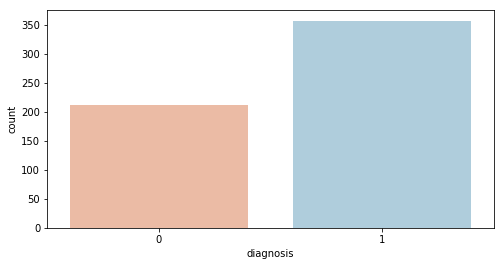

In [4]:
# visualize distribution of classes 
plt.figure(figsize=(8, 4))
sns.countplot(df['diagnosis'], palette='RdBu')

# count number of obvs in each class
benign, malignant = df['diagnosis'].value_counts()
print('Number of cells labeled Benign: ', benign)
print('Number of cells labeled Malignant : ', malignant)

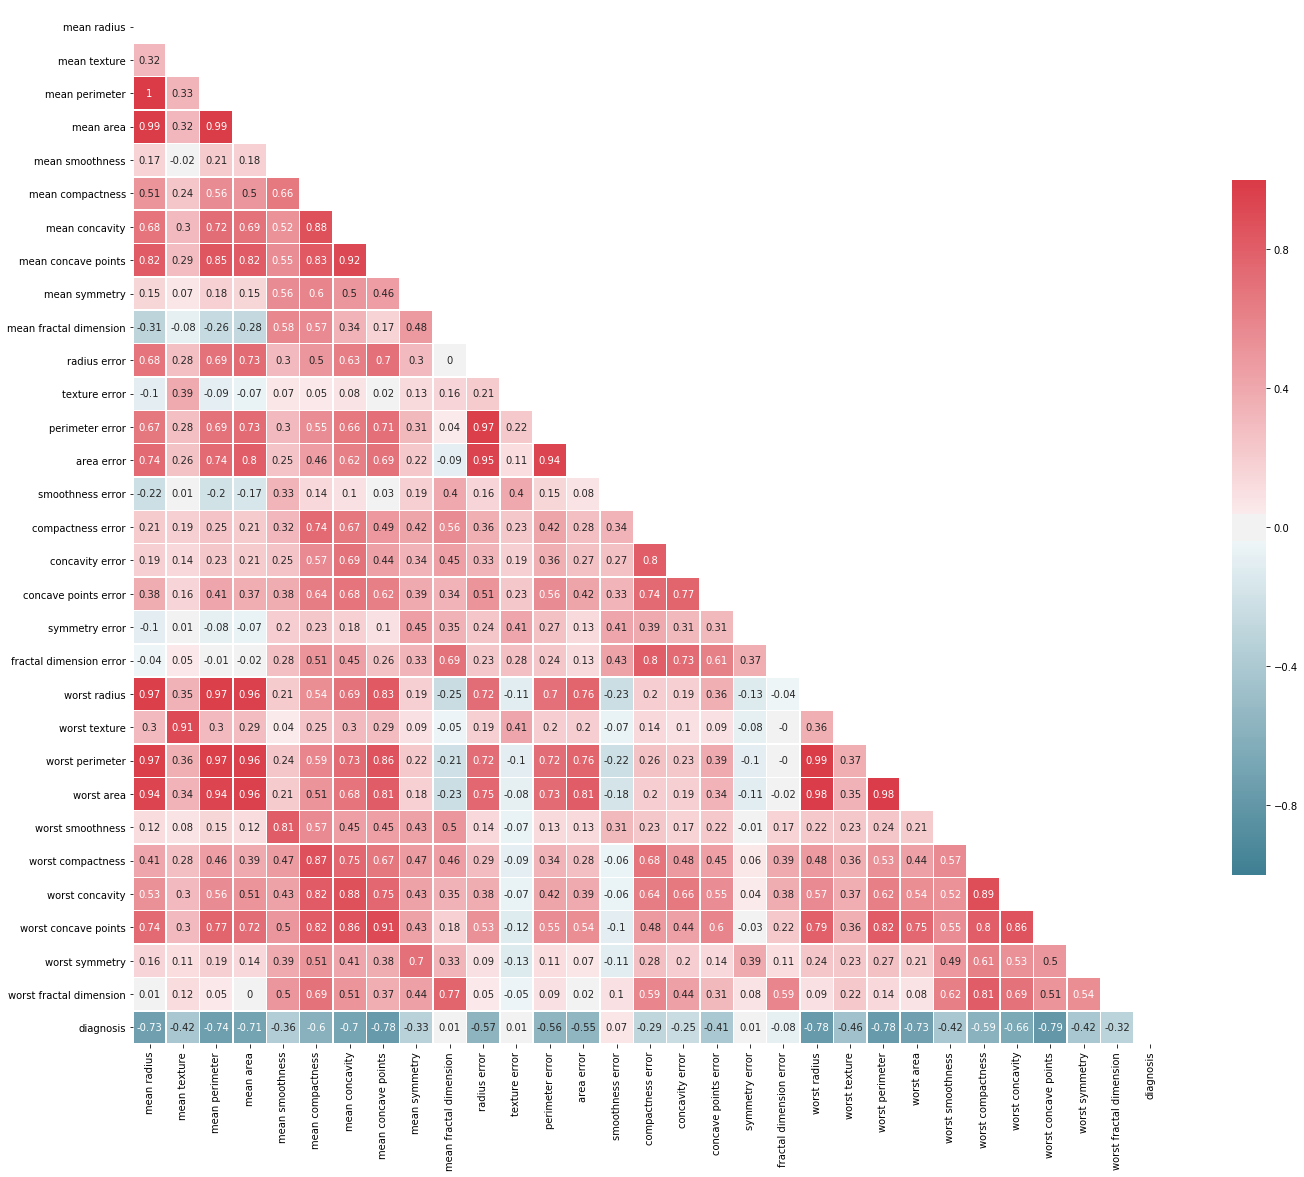

In [5]:
# Generate and visualize the correlation matrix
corr = df.corr().round(2)

# Mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set figure size
f, ax = plt.subplots(figsize=(20, 20))

# Define custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.tight_layout()

In [6]:
# drop all "worst", "perimeter", "area", "concavity", "concave points" columns

for drop_attribute_string in ["worst", "perimeter", "area", "concavity", "concave points"]:
    matching_cols = [s for s in df.columns if drop_attribute_string in s]
    df = df.drop(matching_cols, axis=1)

# verify remaining columns
df.columns

Index(['mean radius', 'mean texture', 'mean smoothness', 'mean compactness',
       'mean symmetry', 'mean fractal dimension', 'radius error',
       'texture error', 'smoothness error', 'compactness error',
       'symmetry error', 'fractal dimension error', 'diagnosis'],
      dtype='object')

In [7]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X = df
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=40)

In [8]:
# Create a string for the formula
# Fit the model
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## Prediction

In [9]:
# predict the test data and show the first 5 predictions
predictions = logmodel.predict(X_test)
predictions[1:6]

array([0, 1, 1, 0, 1])

In [10]:
# Note how the values are numerical. 
# Convert these probabilities into nominal values and check the first 5 predictions again.
predictions_nominal = [ "M" if x < 0.5 else "B" for x in predictions]
predictions_nominal[1:6]

['M', 'B', 'B', 'M', 'B']

In [11]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, predictions, digits=3))
cfm = confusion_matrix(y_test, predictions)

true_negative = cfm[0][0]
false_positive = cfm[0][1]
false_negative = cfm[1][0]
true_positive = cfm[1][1]

print('True Negative:', true_negative)
print('False Positive:', false_positive)
print('False Negative:', false_negative)
print('True Positive:', true_positive)
print('Correct Predictions', 
      round((true_negative + true_positive) / len(predictions_nominal) * 100, 1), '%')

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        99
           1      1.000     1.000     1.000       186

   micro avg      1.000     1.000     1.000       285
   macro avg      1.000     1.000     1.000       285
weighted avg      1.000     1.000     1.000       285

True Negative: 99
False Positive: 0
False Negative: 0
True Positive: 186
Correct Predictions 100.0 %


## References

[1] Mangasarian, Olvi L., and William H. Wolberg. Cancer diagnosis via linear programming. University of Wisconsin-Madison Department of Computer Sciences, 1990.